## 크롤링 기초
### 개념
- 웹 페이지를 그대로 가져와서 데이터를 추출하는 행위

### 도구
- BeautifulSoup : HTML에서 원하는 정보를 쉽게 찾기 위해(파싱) 사용하는 파이썬 라이브러리
```
pip install bs4
```
- requests : HTTP, HTTPS웹 사이트에 요청하기 위해 자주 사용되는 파이썬 모듈
```
pip install requests
```

In [31]:
import requests
URL = f"https://www.example.com"


In [32]:
req = requests.get(URL)
print(req.status_code)    # Response Code

"""
1xx : Informational (단순 정보 제공)

2xx : Successful (성공)

3xx : Redirect (추가 정보 필요)

4xx : Client error

5xx : Server error
"""

200


'\n1xx : Informational (단순 정보 제공)\n\n2xx : Successful (성공)\n\n3xx : Redirect (추가 정보 필요)\n\n4xx : Client error\n\n5xx : Server error\n'

In [33]:
html = req.text
print(html) # html

<!doctype html>
<html>
<head>
    <title>Example Domain</title>

    <meta charset="utf-8" />
    <meta http-equiv="Content-type" content="text/html; charset=utf-8" />
    <meta name="viewport" content="width=device-width, initial-scale=1" />
    <style type="text/css">
    body {
        background-color: #f0f0f2;
        margin: 0;
        padding: 0;
        font-family: -apple-system, system-ui, BlinkMacSystemFont, "Segoe UI", "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;
        
    }
    div {
        width: 600px;
        margin: 5em auto;
        padding: 2em;
        background-color: #fdfdff;
        border-radius: 0.5em;
        box-shadow: 2px 3px 7px 2px rgba(0,0,0,0.02);
    }
    a:link, a:visited {
        color: #38488f;
        text-decoration: none;
    }
    @media (max-width: 700px) {
        div {
            margin: 0 auto;
            width: auto;
        }
    }
    </style>    
</head>

<body>
<div>
    <h1>Example Domain</h1>
    <p>This domai

## requests 요청 메서드
  - POST
  - GET 등..

In [34]:
requests.post("http://httpbin.org/post", headers={'key':'value'})

<Response [200]>

In [35]:
requests.get("http://httpbin.org/get", headers={'key':'value'})

<Response [200]>

In [36]:
r = requests.get('http://api.plos.org/search?q=title:DNA')
r.json()

{'response': {'numFound': 5533,
  'start': 0,
  'maxScore': 6.5690794,
  'docs': [{'id': '10.1371/journal.pone.0000290',
    'journal': 'PLoS ONE',
    'eissn': '1932-6203',
    'publication_date': '2007-03-14T00:00:00Z',
    'article_type': 'Research Article',
    'author_display': ['Rayna I. Kraeva',
     'Dragomir B. Krastev',
     'Assen Roguev',
     'Anna Ivanova',
     'Marina N. Nedelcheva-Veleva',
     'Stoyno S. Stoynov'],
    'abstract': ['Nucleic acids, due to their structural and chemical properties, can form double-stranded secondary structures that assist the transfer of genetic information and can modulate gene expression. However, the nucleotide sequence alone is insufficient in explaining phenomena like intron-exon recognition during RNA processing. This raises the question whether nucleic acids are endowed with other attributes that can contribute to their biological functions. In this work, we present a calculation of thermodynamic stability of DNA/DNA and mRNA/DNA 

  - JSON이란 : 데이터를 저장하거나 전송할 때 사용되는 경량의 DATA 교환 형식
  - Python에서 딕셔너리를 생각하면 됩니다.


## header 파라미터
- 웹 페이지 요청시 필요로하는 HEADER값을 넣어주는 기능
- 요청 헤더가 만족하지 않는 경우 웹 페이지에서 응답을 거부하는 경우가 있으므로 사용법을 알아둬야함.

## 주로 사용하는 파라미터
- referer : 현재 페이지의 이전 페이지를 가르킴. 해당 사용자가 어디에서 온지를 알 수 있음.
- UserAgent : 브라우저 종류
- Accept-Language : 언어 설정
- Authorization : 인증 정보

주로 referer와 UserAgent를 커스터마이징 하여 사용한다.

## 실습 1 : 코로나 데이터 크롤링하기
- 네이버 코로나 발생현황을 통해 코로나 정보를 크롤링해온다.
- 우선 URL을 받아와야 하는데 `https://www.naver.com`에서 검색을 하면 다음과 같은 파라미터를 포함하는 `GET` 방식으로 요청하는것을 알 수 있다.
  - query : 검색어
  - oquery : 이전 검색어
  - 그 외 웹페이지 구성에 필요한 파라미터들

- 여기서 중요한건 query인데, 이 값으로 URL을 요청하면 네이버에서 미세먼지 검색 결과 페이지를 불러올 수 있다.
### 방법 1
- 웹 피이지를 긁어오는 방식

<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="코로나 : 네이버 통합검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="'코로나'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="'코로나'의 네이버 통합검색 결과입니다."> <title>코로나 : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_220113.css"> <link rel="stylesheet" type="text/css" href="htt
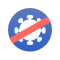
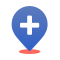
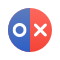
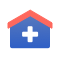

In [37]:
query = "코로나"
URL = 'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query='+query
req = requests.get(URL)
html = req.text
print(html) # html을 불러옴

In [38]:
from bs4 import BeautifulSoup
import pprint
soup = BeautifulSoup(html, 'html.parser')
api_box = soup.find("div", {"class":"main_tab_area"})
pprint.pprint(api_box)

<div class="main_tab_area"> <div class="main_tab_area"> <ul class="main_tab_list" role="tablist"> <li aria-selected="true" role="tab"> <a href="?where=nexearch&amp;sm=tab_etc&amp;qvt=0&amp;query=%EC%BD%94%EB%A1%9C%EB%82%9819" nocr="" onclick="return goOtherCR(this, 'a=nco_xxe*1&amp;r=1&amp;i=80202lh0_000000000000&amp;u=' + urlencode(this.href));"><span class="menu">발생현황</span></a> </li> <li role="tab"> <a href="?where=nexearch&amp;sm=tab_etc&amp;qvt=0&amp;query=%EC%BD%94%EB%A1%9C%EB%82%9819%EB%B0%B1%EC%8B%A0%ED%98%84%ED%99%A9" nocr="" onclick="return goOtherCR(this, 'a=nco_xxe*1&amp;r=1&amp;i=80202lh0_000000000000&amp;u=' + urlencode(this.href));"><span class="menu">백신접종현황</span></a> </li> </ul> <div class="status_info"> <ul> <li class="info_01"> <strong class="info_title">일일 확진</strong> <p class="info_num">8,571</p> </li> <li class="info_02"> <strong class="info_title">재원 위중증</strong> <p class="info_num">392</p> </li> <li class="info_03"> <strong class="info_title">신규 입원</strong> <p c

In [39]:
soup.select("#_cs_production_type > div > div.main_tab_area")[0]
# 최근 css selector로 따오는 것이 호환이 잘 되지 않는 경우가 많음

<div class="main_tab_area"> <div class="main_tab_area"> <ul class="main_tab_list" role="tablist"> <li aria-selected="true" role="tab"> <a href="?where=nexearch&amp;sm=tab_etc&amp;qvt=0&amp;query=%EC%BD%94%EB%A1%9C%EB%82%9819" nocr="" onclick="return goOtherCR(this, 'a=nco_xxe*1&amp;r=1&amp;i=80202lh0_000000000000&amp;u=' + urlencode(this.href));"><span class="menu">발생현황</span></a> </li> <li role="tab"> <a href="?where=nexearch&amp;sm=tab_etc&amp;qvt=0&amp;query=%EC%BD%94%EB%A1%9C%EB%82%9819%EB%B0%B1%EC%8B%A0%ED%98%84%ED%99%A9" nocr="" onclick="return goOtherCR(this, 'a=nco_xxe*1&amp;r=1&amp;i=80202lh0_000000000000&amp;u=' + urlencode(this.href));"><span class="menu">백신접종현황</span></a> </li> </ul> <div class="status_info"> <ul> <li class="info_01"> <strong class="info_title">일일 확진</strong> <p class="info_num">8,571</p> </li> <li class="info_02"> <strong class="info_title">재원 위중증</strong> <p class="info_num">392</p> </li> <li class="info_03"> <strong class="info_title">신규 입원</strong> <p c

In [40]:
data_list = api_box.find("div", {"class":"status_info"})
for i in data_list.find("ul").find_all("li"):
    print(i.text)

 일일 확진 8,571 
 재원 위중증 392 
 신규 입원 779 
 일일 사망 23 


In [41]:
## 산돌이 스타일로 바꿔볼게요
data_list = api_box.find("div", {"class":"status_info"})
for i in data_list.find("ul").find_all("li"):
    print(i.text)

 일일 확진 8,571 
 재원 위중증 392 
 신규 입원 779 
 일일 사망 23 


### 방법 2
- API를 건들이는 방식
- 개발자모드(F12)에 `Fetch/XHR`탭에 해당 정보를 가져오는 JSON이 존재함
- `https://m.search.naver.com/p/csearch/content/nqapirender.nhn?where=nexearch&pkid=9005&key=diffV2API&_callback=_au_covid19_global_status&u1=1`

In [42]:
import json
url = 'https://m.search.naver.com/p/csearch/content/nqapirender.nhn?where=nexearch&pkid=9005&key=diffV2API'
html = requests.get(url).text
data = json.loads(html)
result = f"지역발생은 {data['result']['data']['dailyCnt'][-1]}명 이며, " \
         f"전일대비 {int(data['result']['data']['dailyCnt'][-1].replace(',','')) - int(data['result']['data']['dailyCnt'][-2].replace(',',''))}명 이에요"
print(result)

지역발생은 8,571명 이며, 전일대비 1058명 이에요


## 실습 1
날씨를 산돌이 페르소나에 맞추어 출력해보세요(이모지는 없어도 됩니다)
날씨는 본인이 사는 지역의 날씨를 출력해보세요

In [43]:
# 1 예시 코드
URL = 'https://search.naver.com/search.naver?query='
def solve(location = '정왕'):
        url = URL + (location + "날씨")
        html = requests.get(url).text
        soup = BeautifulSoup(html, 'html.parser')
        weather_box = soup.find('section', {'class': 'sc_new cs_weather_new _cs_weather'})
        info = weather_box.find('div', {'class': 'weather_graphic'})
        weather_info = info.find("div", {"class": "weather_main"}).get_text()
        temp = info.find("div", {"class": "temperature_text"}).get_text()
        temp = temp[temp.find("도") + 1:]

        temp_summary = weather_box.find("div", {"class": "temperature_info"})
        compare_yesterday = temp_summary.find("p").get_text().split('  ')[0]

        chart_list = weather_box.find("div", {"class": "report_card_wrap"})
        chart = []  # 미세먼지, 초미세먼지, 자외선, 일몰 순서
        for i in chart_list.find_all("li"):
            chart.append(i.get_text().strip().split(" ")[1])

        result = f"오늘 {location}의 날씨를 알려드릴게요!\n" \
                  f"오늘 날씨는{weather_info}이고,\n" \
                  f"기온은 {temp}C 으로 {compare_yesterday}\n"

        return result
print(solve('인천'))

오늘 인천의 날씨를 알려드릴게요!
오늘 날씨는 흐림 이고,
기온은 5° C 으로 어제보다 3° 낮아요



## 미션 1
네이버 영화의 영화 랭킹에서 상위 50위의 영화 랭킹을 수집해서 아래의 형식으로 출력해보세요
```text
1위 : 특송
2위 : 스파이더맨 : 노 웨이 홈
3위 : ...
...
50위 : 해탄적일천
```

## 로그인이 필요한 사이트 크롤링하기
- 난이도 높은 크롤링 중 하나입니다. eclass 크롤링 실습을 해보면서, 어떤식으로 로그인이 필요한 공간의 정보를 크롤링해올 수 있는지 실습합니다.
- `requests.Session()`을 사용해 세션을 유지한다

In [44]:
from Secrets import (SECRET_ID, SECRET_PW)
LOGIN_URL = r'https://eclass.kpu.ac.kr/ilos/lo/login.acl'
USER_INFO = {
    'usr_id': SECRET_ID,
    'usr_pwd': SECRET_PW
}
session = requests.Session()
session.post(LOGIN_URL, data= USER_INFO)

<Response [200]>

우리 eclass 사이트의 경우 로그인이 성공하던, 실패하던 무조건 Resoponse Code를 200을 반환하고, JS를 통해 분기를 결정하므로 로그인이 성공적으로 되었는지 알 수 있는 방법이 없다.
그래서 로그인이 된 사용자만 접근할 수 있는 페이지를 불러옴으로서 로그인이 성공적으로 되었는지 확인한다.

In [45]:
USER_INFO_URL = r'http://eclass.kpu.ac.kr/ilos/mp/myinfo_form.acl'
def getInfo():
        try:
            html = session.get(USER_INFO_URL)
            soup = BeautifulSoup(html.text, 'html.parser')
            user_email = soup.find("div", {'style': 'width: 200px; float: left; overflow: hidden;'}).get_text().replace(
                u'\xa0', u'')   # \xa0는 유니코드로 <space> 이다
            user_name = soup.select_one("#user").text
            user_code = (soup.find("tr", {'style': 'height: 40px; vertical-align: middle;'}).
                         find_all("td")[1].text)[(soup.find("tr", {'style': 'height: 40px; vertical-align: middle;'}).
                                                  find_all("td")[1].text).find('(') + 1:(soup.find("tr", {'style': 'height: 40px; vertical-align: middle;'}).
                                                                                         find_all("td")[1].text).find(')')]  # 학번

            return user_name, user_code, user_email

        except Exception as e:
            return False

if getInfo():
    print(getInfo())

('박준하', '2020152016', 'jh01love@naver.com')


In [61]:
NOTICE_LIST = r"http://eclass.kpu.ac.kr/ilos/community/notice_list.acl"
HOME_URL = r"http://eclass.kpu.ac.kr"
url_list = []

html = session.get(NOTICE_LIST)
soup = BeautifulSoup(html.text, 'html.parser')
table = soup.find('tbody')
for lst in table.find_all('tr'):
    title = lst.find('td', {'class':'left'})
    url_list.append(HOME_URL + title.find("a")["href"])

print(url_list)

['http://eclass.kpu.ac.kr/ilos/community/notice_view_form.acl?ARTL_NUM=3159023&SCH_KEY=&SCH_TARGET=&SCH_VALUE=&display=10&start=1', 'http://eclass.kpu.ac.kr/ilos/community/notice_view_form.acl?ARTL_NUM=3147913&SCH_KEY=&SCH_TARGET=&SCH_VALUE=&display=10&start=1', 'http://eclass.kpu.ac.kr/ilos/community/notice_view_form.acl?ARTL_NUM=3315637&SCH_KEY=&SCH_TARGET=&SCH_VALUE=&display=10&start=1', 'http://eclass.kpu.ac.kr/ilos/community/notice_view_form.acl?ARTL_NUM=3257630&SCH_KEY=&SCH_TARGET=&SCH_VALUE=&display=10&start=1', 'http://eclass.kpu.ac.kr/ilos/community/notice_view_form.acl?ARTL_NUM=3257181&SCH_KEY=&SCH_TARGET=&SCH_VALUE=&display=10&start=1', 'http://eclass.kpu.ac.kr/ilos/community/notice_view_form.acl?ARTL_NUM=3248664&SCH_KEY=&SCH_TARGET=&SCH_VALUE=&display=10&start=1', 'http://eclass.kpu.ac.kr/ilos/community/notice_view_form.acl?ARTL_NUM=3243550&SCH_KEY=&SCH_TARGET=&SCH_VALUE=&display=10&start=1', 'http://eclass.kpu.ac.kr/ilos/community/notice_view_form.acl?ARTL_NUM=3184572&SCH_

In [73]:
for url in url_list:
    req = requests.get(url)
    soup = BeautifulSoup(req.text, 'html.parser')
    print(soup.select("#myform > table > tbody > tr:nth-child(1) > td")[0].text)
    print(soup.select("#myform > table > tbody > tr:nth-child(5) > td")[0].text)
    print("==================================================================")

[원격교육지원센터] ZOOM 실시간 강의 [로그인하여 참가] 팝업이 뜨는 경우

안녕하세요 원격교육지원센터입니다.  1차시는 URL을 통해 무사히 수업을 진행하였으나2차시에는 [로그인하여 참가] 라는 팝업이 떠서 당황하셨을 것으로 여겨집니다.  기존 ZOOM에 로그인이 되어 있는 교수님과 학생분들은 상관이 없지만URL을 통해서 접속하시는 교수님과 학생분들은 실시간 강의에 등록해 두신 ZOOM 회원 ID로ZOOM(ZOOM.us)로 회원 가입해 두시고 사용하시면 안정적으로 사용하실 수 있습니다.  -원격교육지원센터-  


E-class 동영상 수업 출결 처리 안내(+전자출결 반영일 추가안내)

E-class 동영상 수업 출결 처리 안내를 붙임과 같이 알려드리오니 수강에 참고하시기 바랍니다. 추가적으로 온라인 강의 수강시 출석부 반영일 다음날 전자출결에 업데이트 되니, 출결 이의 신청시 참고하시기 바랍니다.예)  학습인정기간(9.8~9.14) 내 수강했지만 출석부 반영일(9.10)이 지난 9.11에도 전자출결 미반영시 출결이의 신청      단, 학습인정기간 내이지만 출석부 반영일 이후(9.10~14) 수강시 수강한 날로부터 다음날 전자출결 반영 확인 필요  감사합니다. 


[원격교육지원센터] 강의자료 및 과제 파일 업로드 관련(+문제 해결 완료)

 안녕하세요, 원격교육지원센터입니다. 강의자료와 과제 파일이 사이즈 초과로 업로드 되지 않은 문제 해결 완료되었습니다.  감사합니다. 


[원격교육지원센터] 동영상 자르기

안녕하세요 원격교육지원센터입니다.  강의 촬영을 하셨는데 끊을수가 없어서 영상이 길어지는 경우가 있어 영상을 잘라서 업로드 하고 싶은 경우가 생기기도 합니다.  동영상을 잘라서 올리고 싶은 경우 사용법을 공유하오니 참고하시기 바랍니다.  -원격교육지원센터- 


[원격교육지원센터] K-MOOC 강좌 수강안내

안녕하세요원격교육지원센터 입니다.  신청기간 : 2021년 10월 6일 ~ 2021년 11월 7일신청방법: 포스터 참조문의: 원격교육지원

## 미션 2
- 앞에 수집했던 영화에서 영화 장르 (개요), 개봉 일자, 감독을 수집해서 정리 후 출력해보세요
  
  
## 미션 3

### 난이도 ★
- 한국산업기술대학교 eclass 의 교육현황 탭에서 1페이지의 과목/교수/청강 가능 여부를 크롤링해서 정리후 출력해보세요

### 난이도 ★★★
- 한국산업기술대학교 eclass 의 교육현황 탭에서 1페이지부터 5페이지의 과목/교수/청강 가능 여부를 크롤링해서 정리후 출력해보세요

### 난이도 ★★★★★
- 본인이 들었던 과목 중 하나의 공지사항을 크롤링해보세요
  - 이 경우에는 과목방 들어가는 부분을 Network 탭으로 여러번 확인해서 필요로 하는 파라미터들을 모두 data 영역에 넣어 헤더로 보내주는것이 중요합니다.
  - HINT : 각 과목별 과목 코드를 확인 후, 해당 과목이 존재하는 링크로 연결됨
  - HINT2 : 각 과목별 공지사항 URL은 동일함 (즉, 과목코드로 구분해 출력해주는 방식임)
  - HINT3 : 자바스크립트롤 확인해보면 답이 있습니다.(Onclick의 JS 코드를 Console에 붙여 결과를 확인해보세요)
